In [3]:
import sys
#!conda install --yes --prefix {sys.prefix} pandas
#!conda install --yes --prefix {sys.prefix} numpy
#!conda install --yes --prefix {sys.prefix} matplotlib
#!conda install --yes --prefix {sys.prefix} seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
plt.style.use("fivethirtyeight")

# Data Preproccessing
Here we will read in our data, as well as check the values, and prepare it for manipulation

In [5]:
data = pd.read_csv("Datasets/telecom_churn.csv")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.dtypes
data.shape
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.groupby('Churn')[['MonthlyCharges', 'tenure']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure               
                 min     max       mean    min max       mean
Churn                                                        
No             18.25  118.75  61.265124      0  72  37.569965
Yes            18.85  118.35  74.441332      1  72  17.979133

In [8]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [10]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [11]:
data['TotalCharges'].isna().sum()

11

In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [13]:
data['TotalCharges'].dtypes

dtype('float64')

In [14]:
data.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure                TotalCharges  \
                 min     max       mean    min max       mean          min   
Churn                                                                        
No             18.25  118.75  61.265124      0  72  37.569965        18.80   
Yes            18.85  118.35  74.441332      1  72  17.979133        18.85   

                             
           max         mean  
Churn                        
No     8672.45  2555.344141  
Yes    8684.80  1531.796094

In [15]:
data.dropna(inplace = True)
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.shape

(7032, 21)

In [17]:
data.groupby('Churn')[['OnlineBackup', 'OnlineSecurity', 'PhoneService']].count()

,OnlineBackup,OnlineSecurity,PhoneService
Churn,,,
No,5163,5163,5163
Yes,1869,1869,1869


# Data Visualization
Now we will visualize some stuff!

In [18]:
def half_corr_heatmap(data, title=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)

    mask = np.zeros_like(data.corr())
    mask[np.tril_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(data.corr(), mask=mask, annot=True, cmap="coolwarm")

    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

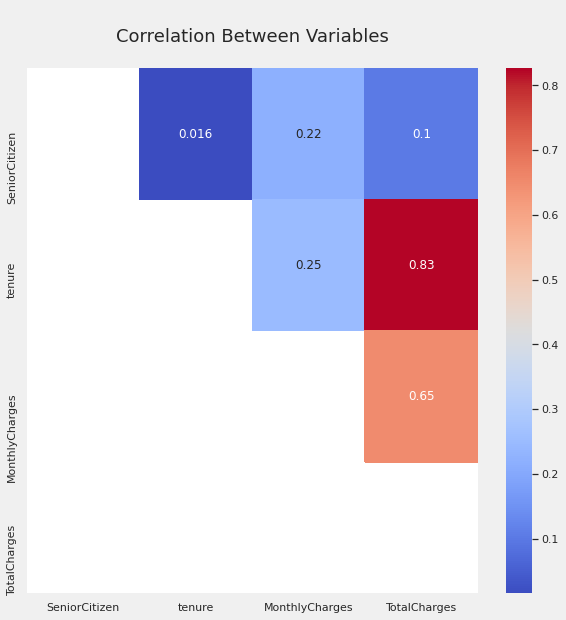

In [19]:
half_corr_heatmap(data, 'Correlation Between Variables')
## churn column issue write about

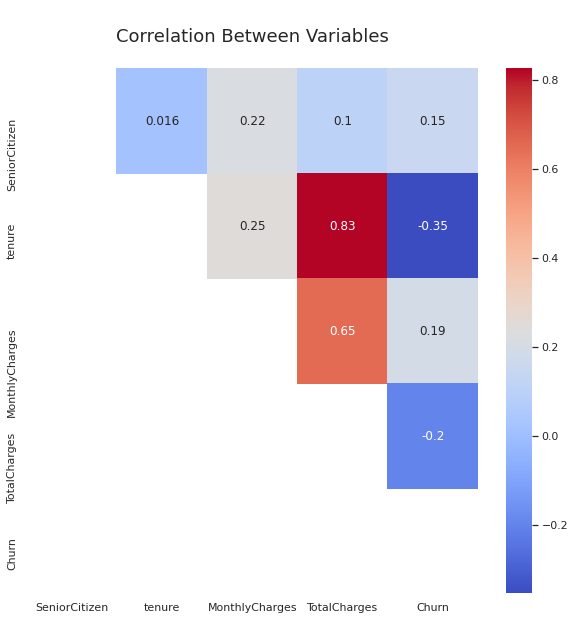

In [20]:
data['Churn'] = data['Churn'].map({'Yes' : 1, 'No' : 0})
half_corr_heatmap(data, 'Correlation Between Variables')

In [21]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)

    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")

    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

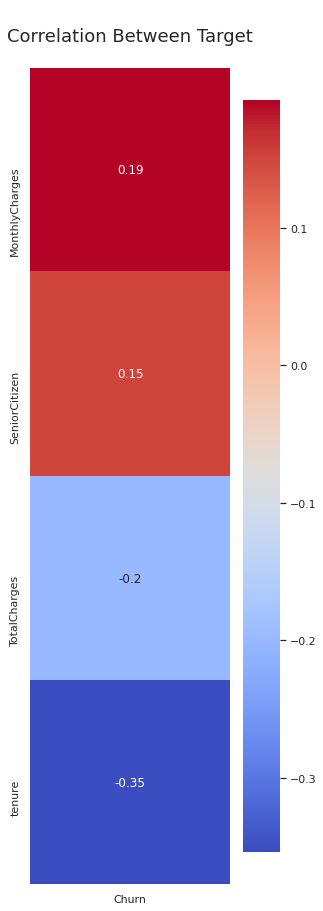

In [22]:
corr_for_target(data, 'Churn', 'Correlation Between Target')

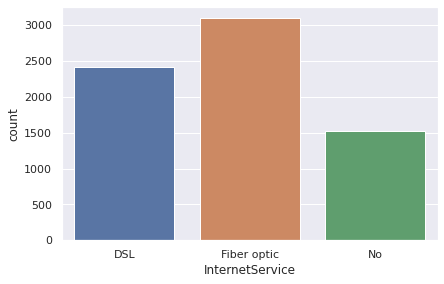

In [23]:
sns.countplot(data['InternetService']);

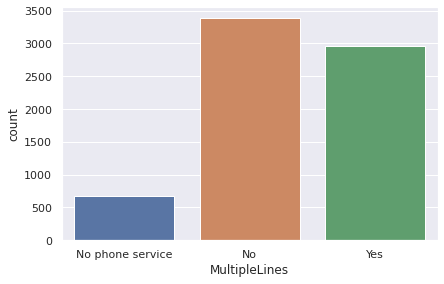

In [24]:
sns.countplot(data['MultipleLines']);

In [25]:
data2 = data.drop(['customerID'], axis = 1)

In [26]:
numerical = data2.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data2.columns.difference(numerical)

data2[categorical] = data2[categorical].astype('object')
print(f'Categorical: {categorical}')

Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

Categorical: Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'gender'],
      dtype='object')


In [27]:
data2 = pd.get_dummies(data2)
data2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [28]:
data_cols = data.drop('customerID', axis = 1)

for col in data_cols.columns:
    print(col, "\n")
    print(data[col].unique(), "\n")

gender 

['Female' 'Male'] 

SeniorCitizen 

[0 1] 

Partner 

['Yes' 'No'] 

Dependents 

['No' 'Yes'] 

tenure 

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService 

['No' 'Yes'] 

MultipleLines 

['No phone service' 'No' 'Yes'] 

InternetService 

['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 

['No' 'Yes' 'No internet service'] 

OnlineBackup 

['Yes' 'No' 'No internet service'] 

DeviceProtection 

['No' 'Yes' 'No internet service'] 

TechSupport 

['No' 'Yes' 'No internet service'] 

StreamingTV 

['No' 'Yes' 'No internet service'] 

StreamingMovies 

['No' 'Yes' 'No internet service'] 

Contract 

['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling 

['Yes' 'No'] 

PaymentMethod 

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges 

[29

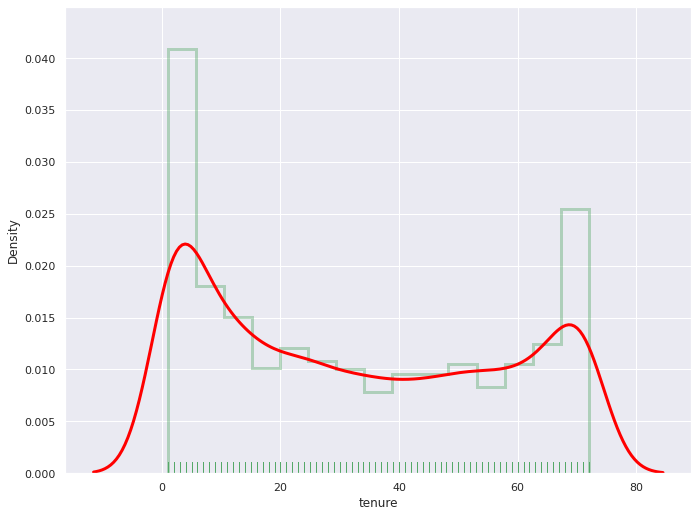

In [29]:
plt.figure(figsize = (10,8))

ax = sns.distplot(data['tenure'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "red", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 0.4, "color": "g"});

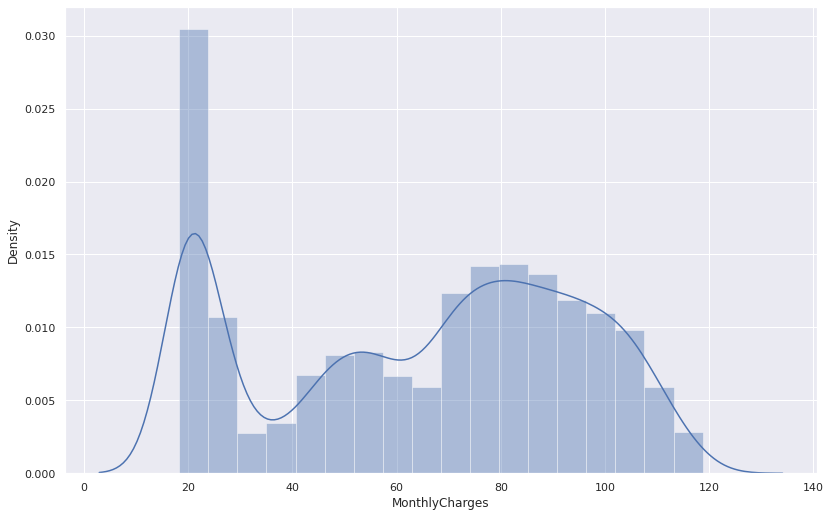

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(data['MonthlyCharges']);

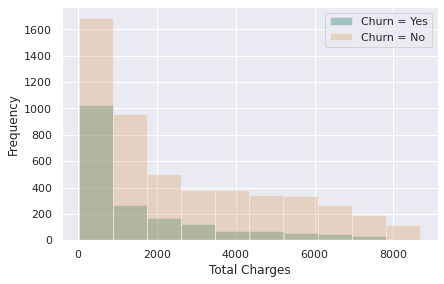

In [31]:
data[data['Churn'] == 1].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#016a55', label = 'Churn = Yes')

data[data['Churn'] == 0].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'Churn = No')

plt.xlabel('Total Charges')
plt.legend();

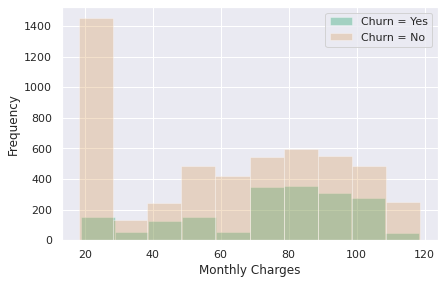

In [32]:
data[data['Churn'] == 1].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#019955', label = 'Churn = Yes')

data[data['Churn'] == 0].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'Churn = No')

plt.xlabel('Monthly Charges')
plt.legend();

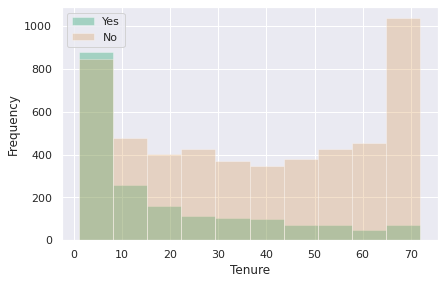

In [33]:
data[data['Churn'] == 1].tenure.plot(kind = 'hist', alpha = 0.3, color = '#019955', label = 'Yes')
data[data['Churn'] == 0].tenure.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'No')
plt.xlabel('Tenure')
plt.legend();

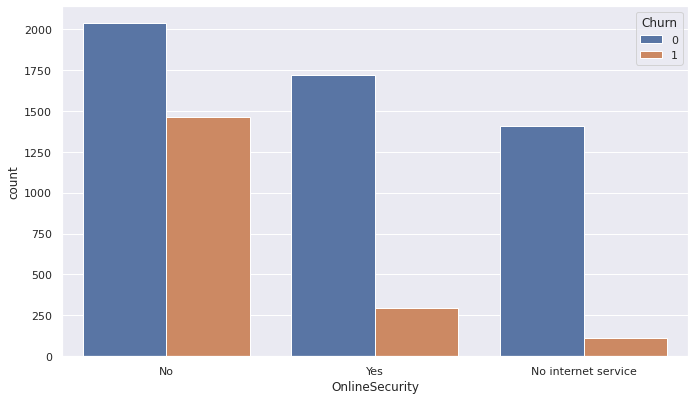

In [34]:
plt.figure(figsize = (10, 6))
sns.countplot('OnlineSecurity', data = data, hue = 'Churn');

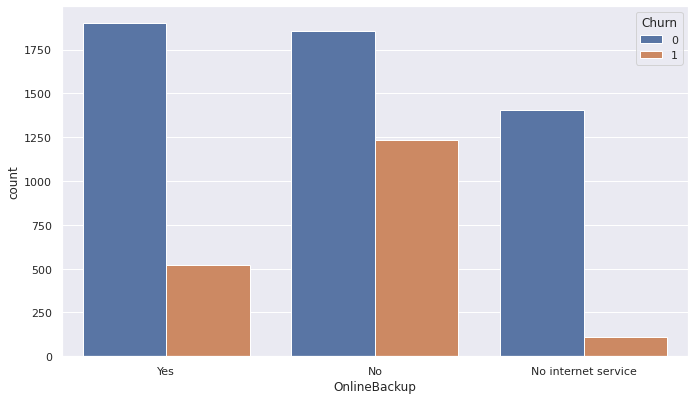

In [35]:
plt.figure(figsize = (10, 6))
sns.countplot('OnlineBackup', data = data, hue = 'Churn');

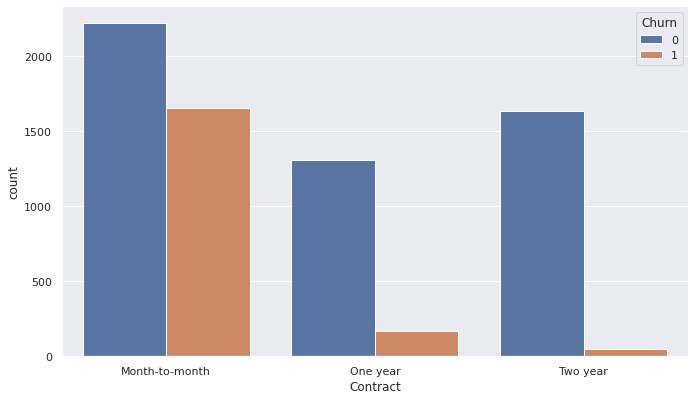

In [36]:
plt.figure(figsize = (10, 6))
sns.countplot('Contract', data = data, hue = 'Churn');

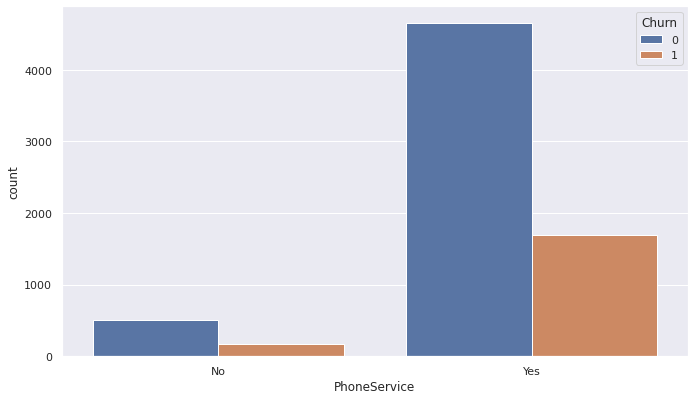

In [37]:
plt.figure(figsize = (10, 6))
sns.countplot('PhoneService', data = data, hue = 'Churn');

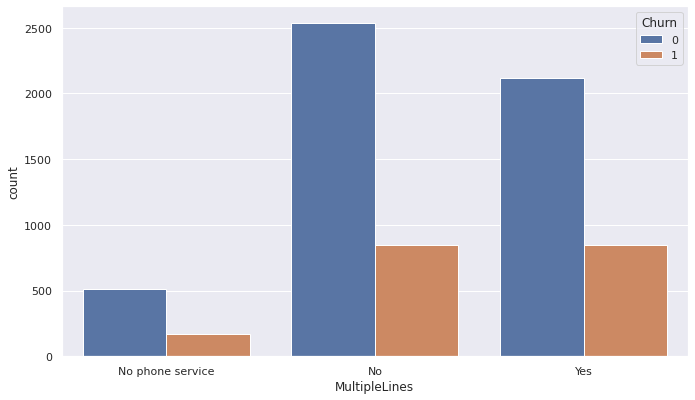

In [38]:
plt.figure(figsize = (10, 6))
sns.countplot('MultipleLines', data = data, hue = 'Churn');

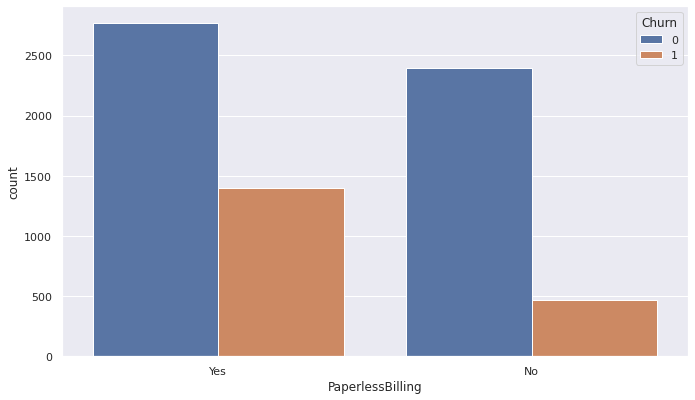

In [39]:
plt.figure(figsize = (10, 6))
sns.countplot('PaperlessBilling', data = data, hue = 'Churn');

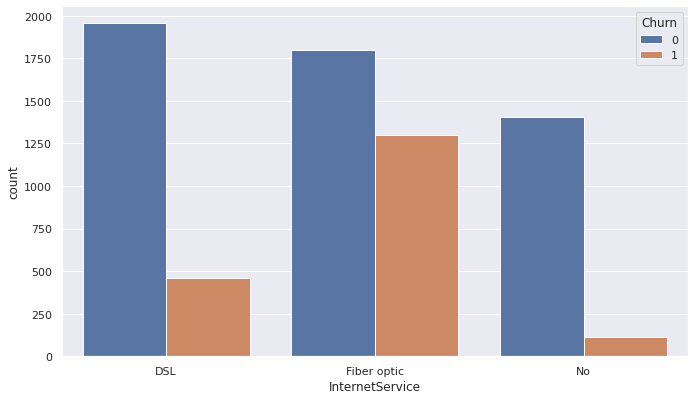

In [40]:
plt.figure(figsize = (10, 6))
sns.countplot('InternetService', data = data, hue = 'Churn');

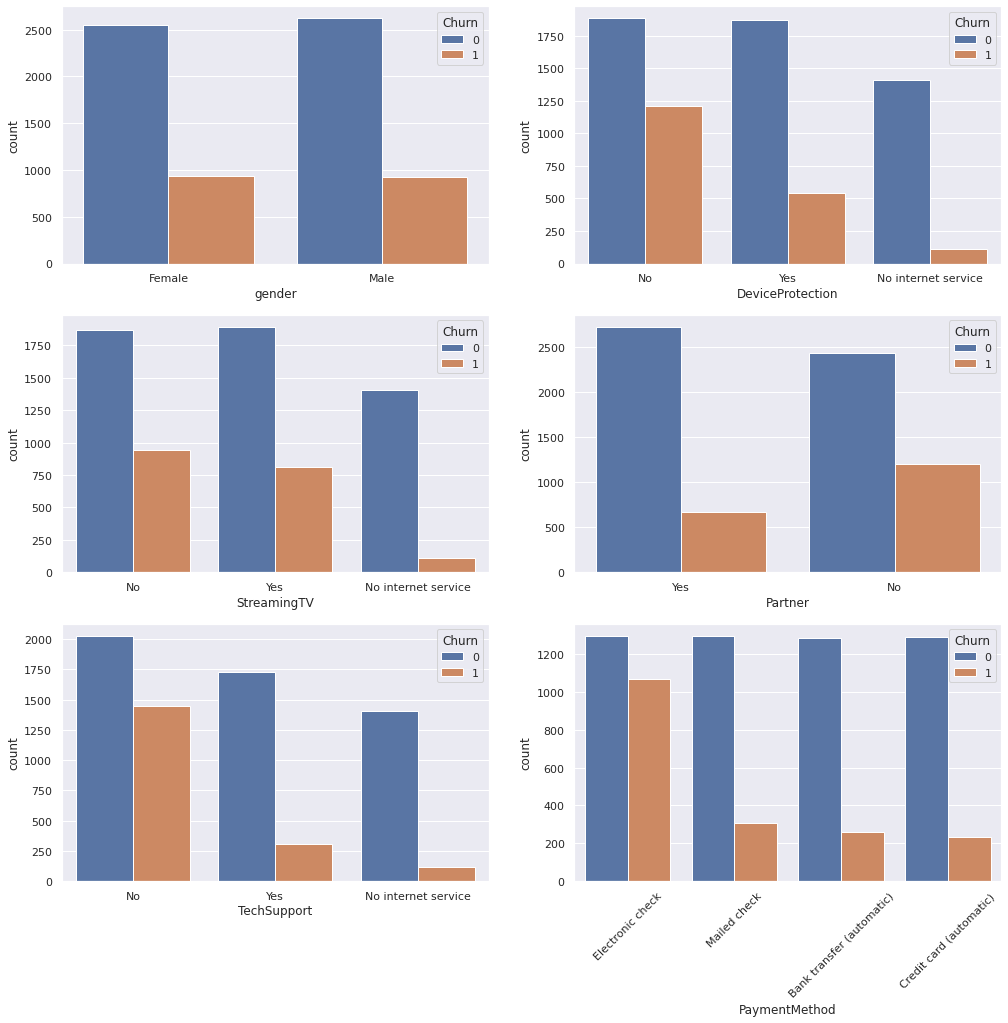

In [41]:
plt.figure(figsize = (15, 15))

plt.subplot(3, 2, 1)
sns.countplot('gender', data = data, hue = 'Churn')

plt.subplot(3, 2, 2)
sns.countplot('DeviceProtection', data = data, hue = 'Churn')

plt.subplot(3, 2, 3)
sns.countplot('StreamingTV', data = data, hue = 'Churn')

plt.subplot(3, 2, 4)
sns.countplot('Partner', data = data, hue = 'Churn')

plt.subplot(3, 2, 5)
sns.countplot('TechSupport', data = data, hue = 'Churn')

plt.subplot(3, 2, 6)
sns.countplot('PaymentMethod', data = data, hue = 'Churn')

plt.xticks(rotation = 45);

<Figure size 1440x504 with 0 Axes>

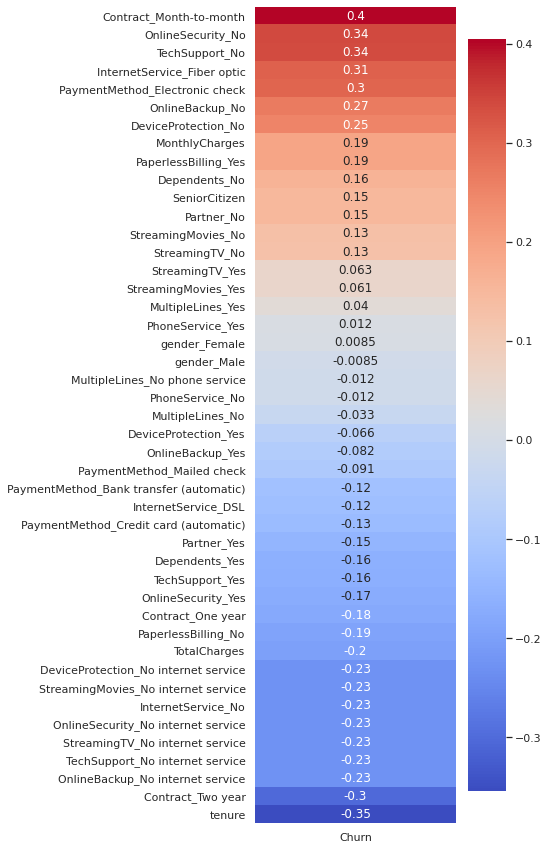

In [42]:
plt.figure(figsize = (20, 7))
corr_for_target(data2, 'Churn');

In [47]:
data2.to_csv("Datasets/telecom_churn_Processed.csv")
